# Trabajo Práctico de Optimización no Lineal

__Introducción a Investigación Operativa y Optimización - 2C 2025__

__Integrantes del grupo:__
-
- Ariel Bakal | LU 1014/22
-
-



In [4]:
# import kagglehub
# import os
# import pandas as pd
# import numpy as np
# from numpy.linalg import norm
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
# from sklearn.model_selection import train_test_split
# import seaborn.objects as so
# from time import perf_counter

# Regresión Lasso

## Carga de datos

In [ ]:
# Cargamos los datos y visualizamos los primeros 5
data = pd.read_csv('transfermarkt_fbref_201920.csv', delimiter=';')
data.head()

Column1                 player nationality position   squad  age  \
0       21  Martin Aguirregabiria      es ESP       DF  Alavés   23   
1      390           Oliver Burke     sco SCO    MF,FW  Alavés   22   
2      430       Ví­ctor Camarasa      es ESP       MF  Alavés   25   
3      737           Rubén Duarte      es ESP       DF  Alavés   23   
4      770            Rodrigo Ely      br BRA       DF  Alavés   25   

   birth_year    value  height                      position2  ... Pts/G  \
0        1996  4000000     178          Defender - Right-Back  ...  1.03   
1        1997  4000000     188         Forward - Right Winger  ...  1.03   
2        1994  4000000     183  Midfielder - Central Midfield  ...  1.03   
3        1995  4000000     172           Defender - Left-Back  ...  1.03   
4        1993  1000000     188         Defender - Centre-Back  ...  1.03   

     xG   xGA  xGDiff  xGDiff/90  Attendance  CL  WinCL  CLBestScorer   Season  
0  37.0  53.2   -16.2      -0.43      12,177   0      0           0.0  201920#  
1  37.0  53.2   -16.2      -0.43      12,177   0      0           0.0  201920#  
2  37.0  53.2   -16.2      -0.43      12,177   0      0           0.0  201920#  
3  37.0  53.2   -16.2      -0.43      12,177   0      0           0.0  201920#  
4  37.0  53.2   -16.2      -0.43      12,177   0      0           0.0  201920#  

[5 rows x 400 columns]

In [ ]:
# Esta funcion filtra los datos según la posición de interés y divide a los datos en conjuntos de entrenamiento y testeo.

# Las posiciones pueden ser:
# GK: arquero
# DF: defensor
# MF: mediocampista
# FW: delantero

def datos_posicion(data, posicion):
  # Nos quedamos con los datos de la posicion de interes y eliminamos las columnas con datos no relevantes
  data_clean = data[data['position'].str.contains(posicion)].drop(columns=['Column1', 'birth_year', 'games_starts', 'CLBestScorer', 'CL', 'WinCL', *data.select_dtypes(include='object').columns])
  data_clean = data_clean.drop(columns=data_clean.columns[np.where(data_clean.sum().abs() < 1e-6)])

  # Agregamos una columna de 1's para la ordenada al origen
  # stats = pd.concat((pd.Series(np.ones(data_clean.shape[0]), name='Intercept'), data_clean.drop(columns='value').reset_index(drop=True)), axis=1)

  # Separamos los atributos de los jugadores
  stats = data_clean.drop(columns='value')

  # Dividimos los datos en conjuntos de entrenamiento (80% de los datos) y de testeo (20% de los datos)
  X_train, X_test, y_train, y_test = train_test_split(stats, data_clean['value'], test_size=0.2, random_state=11)

  # Estandarizamos los datos de entrenamiento y de testeo
  X_scaler = StandardScaler()
  Y_scaler = StandardScaler()

  X_train_scaled = X_scaler.fit_transform(X_train)
  y_train_scaled = Y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1)).flatten()

  X_test_scaled = X_scaler.transform(X_test)
  y_test_scaled = Y_scaler.transform(y_test.to_numpy().reshape(-1, 1)).flatten()

  return X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled, stats

## Algunas funciones útiles

Las siguientes funciones pueden resultar de utilidad al momento de analizar resultados.

In [ ]:
# Esta funcion sirve para reportar el error R² para el conjunto de entrenamiento y el de testeo
def calcular_errores(X, X_test, y, y_test, beta):
  print('Error entrenamiento: ')
  print('MSE: ', mean_squared_error(y, X@beta))
  print('R²: ', r2_score(y, X@beta))
  print('\n')
  print('Error testeo: ')
  print('MSE: ', mean_squared_error(y_test, X_test@beta))
  print('R²: ', r2_score(y_test, X_test@beta))


# Esta funcion devuelve un vector con el valor de la coordenada de beta que le corresponde a cada atributo, ordenado de menor a mayor
def etiquetas_beta(stats, beta):
  return pd.Series(beta, index=stats.columns).sort_values()

# Esta función es análoga a etiquetas_beta, pero filtra los atributos con pesos de valor absoluto mayor a umbral
def etiquetas_beta_umbral(stats, beta, umbral=0.1):
  s = pd.Series(beta, index=stats.columns).sort_values()
  return s[s.abs() > umbral]

# Esta funcion grafica los valores de beta, para comparar su tamaño
def graficar_betas(beta):
  beta_c = beta.copy()
  beta_c.sort()
  plot = so.Plot().add(so.Dot(), x=np.arange(beta.shape[0]), y=beta_c)
  plot.show()

## Ejercicio 1

In [ ]:
# Para obtener los datos de los defensores:
X, X_test, y, y_test, stats = datos_posicion(data, 'DF')

## Ejercicio 2

In [ ]:
def adam_penalizado(func, x, alpha, lamda, beta_1=0.9, beta_2=0.99, eps=1e-5, k_max=1000):
  # COMPLETAR
  return x

## Ejercicio 3

# Máquina de Soporte Vectorial

## Carga de datos

In [5]:
# Descargamos los datos y cargamos el .csv
path = kagglehub.dataset_download("maso0dahmed/football-players-data", force_download=True)
fifa_data = pd.read_csv(os.path.join(path, 'fifa_players.csv'))

100%|██████████| 1.24M/1.24M [00:00<00:00, 1.45MB/s]

Extracting files...


In [6]:
# Visualizamos los primeros 5 datos
fifa_data.head()

name                       full_name birth_date  age  height_cm  \
0      L. Messi  Lionel Andrés Messi Cuccittini  6/24/1987   31     170.18   
1    C. Eriksen    Christian  Dannemann Eriksen  2/14/1992   27     154.94   
2      P. Pogba                      Paul Pogba  3/15/1993   25     190.50   
3    L. Insigne                 Lorenzo Insigne   6/4/1991   27     162.56   
4  K. Koulibaly               Kalidou Koulibaly  6/20/1991   27     187.96   

   weight_kgs  positions nationality  overall_rating  potential  ...  \
0        72.1   CF,RW,ST   Argentina              94         94  ...   
1        76.2  CAM,RM,CM     Denmark              88         89  ...   
2        83.9     CM,CAM      France              88         91  ...   
3        59.0      LW,ST       Italy              88         88  ...   
4        88.9         CB     Senegal              88         91  ...   

   long_shots  aggression interceptions  positioning  vision  penalties  \
0          94          48            22           94      94         75   
1          89          46            56           84      91         67   
2          82          78            64           82      88         82   
3          84          34            26           83      87         61   
4          15          87            88           24      49         33   

  composure  marking standing_tackle  sliding_tackle  
0        96       33              28              26  
1        88       59              57              22  
2        87       63              67              67  
3        83       51              24              22  
4        80       91              88              87  

[5 rows x 51 columns]

In [7]:
# Diccionario de posiciones que se utiliza cuando queremos filtrar por posicion
posicion_dict = {
    'GK': ['GK'],
    'DEF': ['CB', 'RB', 'LB', 'RWB', 'LWB'],
    'MF': ['CM', 'CDM', 'CAM', 'RM', 'LM'],
    'FW': ['ST', 'CF', 'RF', 'LF', 'RW', 'LW']
}
posicion_dict.update({v: [v] for position_type in posicion_dict.values() for v in position_type})

In [8]:
# Para ver todos los atributos:
fifa_data.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

## Algunas funciones útiles

In [9]:
def filtrar_posicion_atributos(data, posicion_dict, posicion_1, posicion_2, atr_1, atr_2):
  """
  Filtra los datos, manteniendo los jugadores de posicion_1 y posicion_2, junto con los atributos indicados.
  Luego, divide los datos en conjuntos de entrenamiento y testeo.
  Codifica con -1 a los jugadores de posicion_1 y con 1 a los jugadores de posicion_2.
  Estandariza las matrices con los atributos de los jugadores.
  Devuelve el dataset filtrado.
  """

  # Filtramos los datos segun las posiciones y atributos de interes.
  data_filt = fifa_data[fifa_data['positions'].str.contains('|'.join(posicion_dict[posicion_1] + posicion_dict[posicion_2]))][['positions', atr_1, atr_2]]

  # Obtenemos la matriz con los atributos de los jugadores
  X = data_filt[[atr_1, atr_2]].to_numpy()

  # Codificamos la posicion de los jugadores
  Y = np.where(data_filt['positions'].str.contains('|'.join(posicion_dict[posicion_1])), -1, 1)

  # Dividimos los datos en entrenamiento y testeo
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

  # Estandarizamos los datos
  X_scaler = StandardScaler()
  X_train_scaled = X_scaler.fit_transform(X_train)
  X_test_scaled = X_scaler.transform(X_test)

  return X_train_scaled, X_test_scaled, y_train, y_test


def graficar(data, posicion_dict, posicion_1, posicion_2, atr_1, atr_2):
  """
  Esta funcion permite visualizar los atributos para las posiciones de interes.
  """

  # Filtramos los datos segun las posiciones y atributos de interes.
  data_filt = fifa_data[fifa_data['positions'].str.contains('|'.join(posicion_dict[posicion_1] + posicion_dict[posicion_2]))][['positions', atr_1, atr_2]]

  # Codificamos la posicion de los jugadores
  Y = np.where(data_filt['positions'].str.contains('|'.join(posicion_dict[posicion_1])), posicion_1, posicion_2)

  plot = so.Plot().add(so.Dots(), data=data_filt, x=atr_1, y=atr_2, color=Y)
  plot.show()


def calcular_precision(X_train, X_test, y_train, y_test, w, b):
  """ Calcula la precision en el conjunto de entrenamiento y de testeo """
  y_train_pred = np.sign(X_train@w + b)
  print(f'Precision en entrenamiento: {accuracy_score(y_train, y_train_pred)} \n')

  y_test_pred = np.sign(X_test@w + b)
  print(f'Precision en entrenamiento: {accuracy_score(y_test, y_test_pred)}')


def graficar_solucion(X_train, X_test, y_train, y_test, w, b):
  """ Grafica los datos junto con el SVM """

  # Configuramos los limites del grafico
  xlims = [min(X_train[:,0].min(), X_test[:,0].min()) - 0.5, max(X_train[:,0].max(), X_test[:,0].max()) + 0.5]
  ylims = [min(X_train[:,1].min(), X_test[:,1].min()) - 0.5, max(X_train[:,1].max(), X_test[:,1].max()) + 0.5]

  plot = (so.Plot()
  .add(so.Dots(), x=X_train[:,0], y=X_train[:,1], color=list(map(str,y_train)))
  .add(so.Dots(marker='x'), x=X_test[:,0], y=X_test[:,1], color=list(map(str,y_test)))
  .add(so.Line(), x=X_train[:,0], y=np.array([(-b-w[0]*X_train[i,0])/w[1] for i in range(X_train.shape[0])]))
  .limit(x=xlims, y=ylims)
  )
  plot.show()



## Ejercicio 4

In [14]:
X, X_test, y, y_test = filtrar_posicion_atributos(fifa_data, posicion_dict, 'GK', 'FW', 'dribbling', 'penalties')

In [15]:
def subgradiente_svm(X, y, w, b, lam):
    """
    Subgradiente de:
      f(w,b) = (lam/2)*||w||^2 + (1/n) * sum_i max(0, 1 - y_i * (x_i^T w + b))
    Args:
      X: matriz (n, d)
      y: vector (n,) con etiquetas en {-1, 1}
      w: vector (d,)
      b: escalar
      lam: λ de regularización
    Returns:
      (grad_w, grad_b)
    """
    import numpy as np

    y = np.asarray(y).reshape(-1)
    n = X.shape[0]

    margins = y * (X @ w + b)
    viol = margins < 1  # puntos que violan el margen

    if np.any(viol):
        grad_w = lam * w - (X[viol].T @ y[viol]) / n
        grad_b = - np.sum(y[viol]) / n
    else:
        grad_w = lam * w
        grad_b = 0.0

    return grad_w, float(grad_b)

In [16]:

def metodo_gradiente_svm(X, y, lam, alpha=0.01, k_max=1000, tol=1e-6):
    """
    Método del Gradiente con paso fijo para SVM.
    
    Args:
      X: matriz (n, d) de atributos
      y: vector (n,) con etiquetas en {-1, 1}
      lam: λ de regularización
      alpha: longitud del paso (default: 0.01)
      k_max: número máximo de iteraciones
      tol: tolerancia para convergencia
    
    Returns:
      (w, b): solución encontrada
    """
    n, d = X.shape
    
    # Inicialización
    w = np.zeros(d)
    b = 0.0
    
    for k in range(k_max):
        # Calcular subgradiente
        grad_w, grad_b = subgradiente_svm(X, y, w, b, lam)
        
        # Actualizar w y b
        w_new = w - alpha * grad_w
        b_new = b - alpha * grad_b
        
        # Verificar convergencia
        if np.linalg.norm(w_new - w) < tol and abs(b_new - b) < tol:
            break
            
        w = w_new
        b = b_new
    
    return w, b


def adam_svm(X, y, lam, alpha=0.01, beta_1=0.9, beta_2=0.999, eps=1e-8, k_max=1000, tol=1e-6):
    """
    Método ADAM para SVM.
    
    Args:
      X: matriz (n, d) de atributos
      y: vector (n,) con etiquetas en {-1, 1}
      lam: λ de regularización
      alpha: tasa de aprendizaje (default: 0.01)
      beta_1: parámetro de decaimiento para el primer momento (default: 0.9)
      beta_2: parámetro de decaimiento para el segundo momento (default: 0.999)
      eps: término pequeño para estabilidad numérica (default: 1e-8)
      k_max: número máximo de iteraciones
      tol: tolerancia para convergencia
    
    Returns:
      (w, b): solución encontrada
    """
    n, d = X.shape
    
    # Inicialización
    w = np.zeros(d)
    b = 0.0
    
    # Momentos para w
    m_w = np.zeros(d)
    v_w = np.zeros(d)
    
    # Momentos para b
    m_b = 0.0
    v_b = 0.0
    
    for k in range(1, k_max + 1):
        # Calcular subgradiente
        grad_w, grad_b = subgradiente_svm(X, y, w, b, lam)
        
        # Actualizar momentos para w
        m_w = beta_1 * m_w + (1 - beta_1) * grad_w
        v_w = beta_2 * v_w + (1 - beta_2) * (grad_w ** 2)
        
        # Corrección de sesgo para w
        m_w_hat = m_w / (1 - beta_1 ** k)
        v_w_hat = v_w / (1 - beta_2 ** k)
        
        # Actualizar w
        w_new = w - alpha * m_w_hat / (np.sqrt(v_w_hat) + eps)
        
        # Actualizar momentos para b
        m_b = beta_1 * m_b + (1 - beta_1) * grad_b
        v_b = beta_2 * v_b + (1 - beta_2) * (grad_b ** 2)
        
        # Corrección de sesgo para b
        m_b_hat = m_b / (1 - beta_1 ** k)
        v_b_hat = v_b / (1 - beta_2 ** k)
        
        # Actualizar b
        b_new = b - alpha * m_b_hat / (np.sqrt(v_b_hat) + eps)
        
        # Verificar convergencia
        if np.linalg.norm(w_new - w) < tol and abs(b_new - b) < tol:
            break
            
        w = w_new
        b = b_new
    
    return w, b

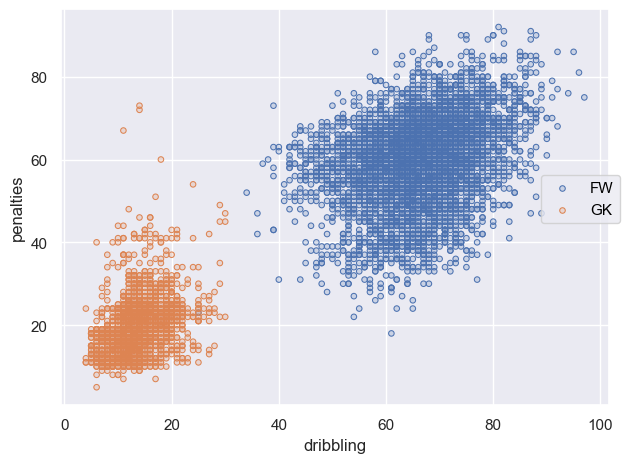

MÉTODO DEL GRADIENTE CON PASO FIJO

--- Configuración 1: Parámetros estándar ---
Precision en entrenamiento: 0.999102656137832 

Precision en entrenamiento: 0.9992821249102656


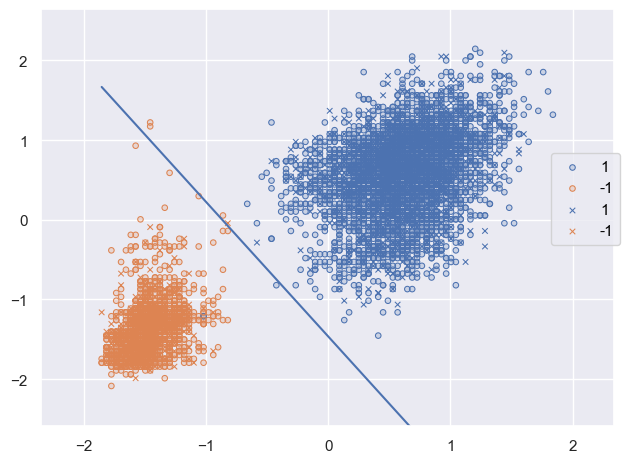


--- Configuración 2: Mayor regularización (lam=0.1) ---
Precision en entrenamiento: 0.9989231873653984 

Precision en entrenamiento: 0.9992821249102656


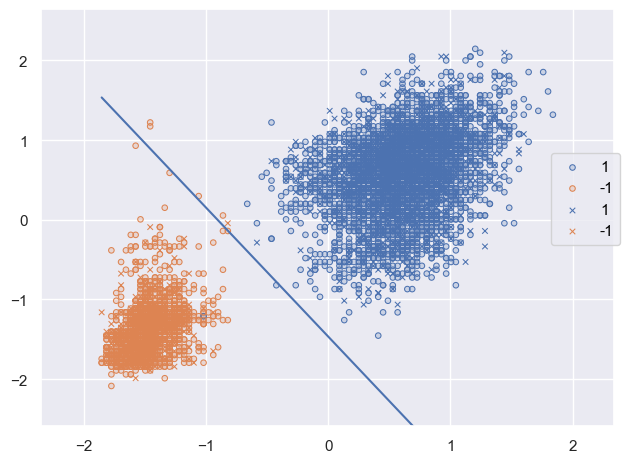


--- Configuración 3: Paso más grande (alpha=0.1) ---
Precision en entrenamiento: 0.9996410624551328 

Precision en entrenamiento: 0.9992821249102656


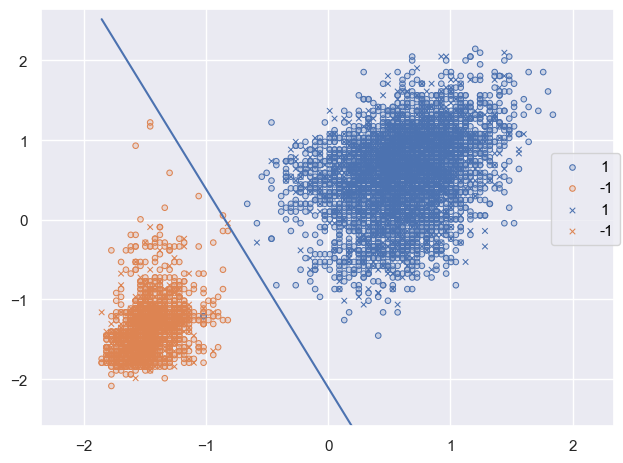


MÉTODO ADAM

--- Configuración 1: Parámetros estándar ---
Precision en entrenamiento: 0.9996410624551328 

Precision en entrenamiento: 0.9992821249102656


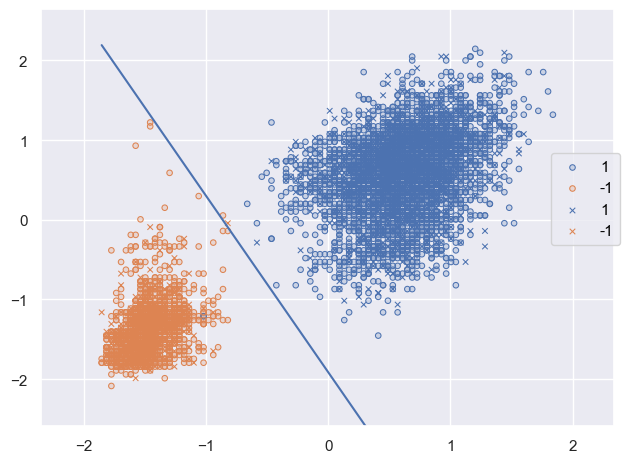


--- Configuración 2: Mayor tasa de aprendizaje (alpha=0.1) ---
Precision en entrenamiento: 0.9998205312275664 

Precision en entrenamiento: 1.0


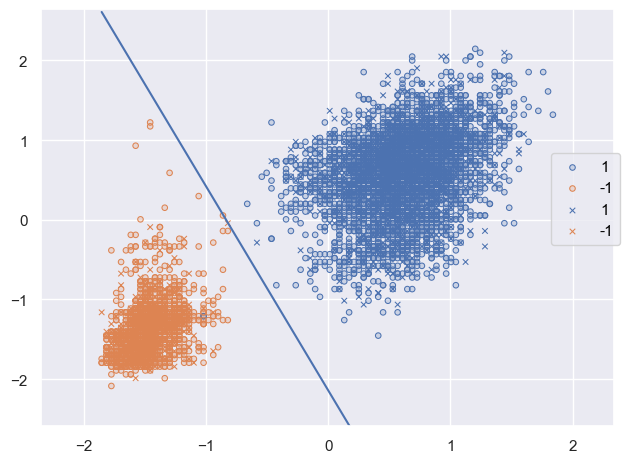


--- Configuración 3: Menor regularización (lam=0.001) ---
Precision en entrenamiento: 0.9996410624551328 

Precision en entrenamiento: 0.9992821249102656


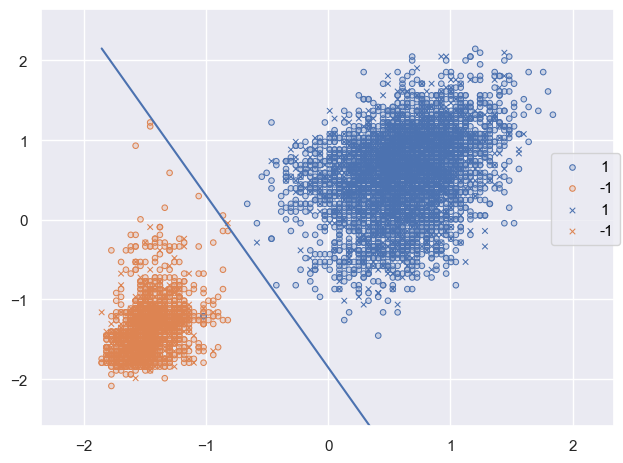


--- Configuración 4: Tasa muy alta (alpha=0.5) ---
Precision en entrenamiento: 0.9998205312275664 

Precision en entrenamiento: 1.0


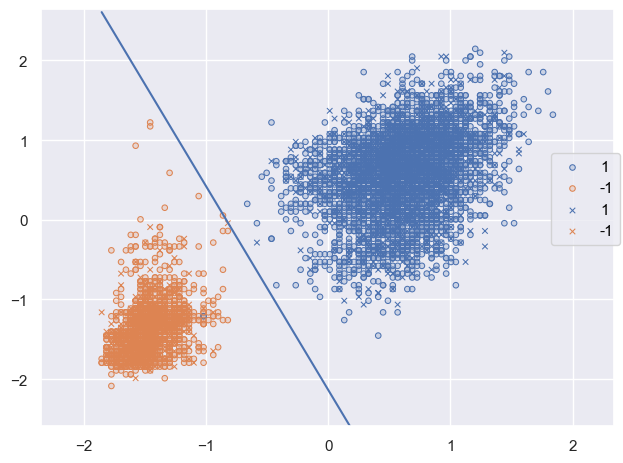


COMPARACIÓN DE CONVERGENCIA

--- Gradiente: 5 ejecuciones con diferentes semillas ---
Ejecución 1: Precisión test = 0.9993, ||w|| = 1.1914, b = 0.8894
Ejecución 2: Precisión test = 0.9993, ||w|| = 1.1914, b = 0.8894
Ejecución 3: Precisión test = 0.9993, ||w|| = 1.1914, b = 0.8894
Ejecución 4: Precisión test = 0.9993, ||w|| = 1.1914, b = 0.8894
Ejecución 5: Precisión test = 0.9993, ||w|| = 1.1914, b = 0.8894

--- ADAM: 5 ejecuciones con diferentes semillas ---
Ejecución 1: Precisión test = 0.9993, ||w|| = 1.4300, b = 1.1265
Ejecución 2: Precisión test = 0.9993, ||w|| = 1.4300, b = 1.1265
Ejecución 3: Precisión test = 0.9993, ||w|| = 1.4300, b = 1.1265
Ejecución 4: Precisión test = 0.9993, ||w|| = 1.4300, b = 1.1265
Ejecución 5: Precisión test = 0.9993, ||w|| = 1.4300, b = 1.1265


In [17]:
# Primero visualizamos los datos
graficar(fifa_data, posicion_dict, 'GK', 'FW', 'dribbling', 'penalties')

# Método del Gradiente con paso fijo
print("=" * 60)
print("MÉTODO DEL GRADIENTE CON PASO FIJO")
print("=" * 60)

# Configuración 1: Parámetros estándar
print("\n--- Configuración 1: Parámetros estándar ---")
w_grad1, b_grad1 = metodo_gradiente_svm(X, y, lam=0.01, alpha=0.01, k_max=1000)
calcular_precision(X, X_test, y, y_test, w_grad1, b_grad1)
graficar_solucion(X, X_test, y, y_test, w_grad1, b_grad1)

# Configuración 2: Mayor regularización
print("\n--- Configuración 2: Mayor regularización (lam=0.1) ---")
w_grad2, b_grad2 = metodo_gradiente_svm(X, y, lam=0.1, alpha=0.01, k_max=1000)
calcular_precision(X, X_test, y, y_test, w_grad2, b_grad2)
graficar_solucion(X, X_test, y, y_test, w_grad2, b_grad2)

# Configuración 3: Paso más grande
print("\n--- Configuración 3: Paso más grande (alpha=0.1) ---")
w_grad3, b_grad3 = metodo_gradiente_svm(X, y, lam=0.01, alpha=0.1, k_max=1000)
calcular_precision(X, X_test, y, y_test, w_grad3, b_grad3)
graficar_solucion(X, X_test, y, y_test, w_grad3, b_grad3)

# ADAM
print("\n" + "=" * 60)
print("MÉTODO ADAM")
print("=" * 60)

# Configuración 1: Parámetros estándar
print("\n--- Configuración 1: Parámetros estándar ---")
w_adam1, b_adam1 = adam_svm(X, y, lam=0.01, alpha=0.01, k_max=1000)
calcular_precision(X, X_test, y, y_test, w_adam1, b_adam1)
graficar_solucion(X, X_test, y, y_test, w_adam1, b_adam1)

# Configuración 2: Mayor tasa de aprendizaje
print("\n--- Configuración 2: Mayor tasa de aprendizaje (alpha=0.1) ---")
w_adam2, b_adam2 = adam_svm(X, y, lam=0.01, alpha=0.1, k_max=1000)
calcular_precision(X, X_test, y, y_test, w_adam2, b_adam2)
graficar_solucion(X, X_test, y, y_test, w_adam2, b_adam2)

# Configuración 3: Menor regularización
print("\n--- Configuración 3: Menor regularización (lam=0.001) ---")
w_adam3, b_adam3 = adam_svm(X, y, lam=0.001, alpha=0.01, k_max=1000)
calcular_precision(X, X_test, y, y_test, w_adam3, b_adam3)
graficar_solucion(X, X_test, y, y_test, w_adam3, b_adam3)

# Configuración 4: Tasa muy alta (puede divergir)
print("\n--- Configuración 4: Tasa muy alta (alpha=0.5) ---")
w_adam4, b_adam4 = adam_svm(X, y, lam=0.01, alpha=0.5, k_max=1000)
calcular_precision(X, X_test, y, y_test, w_adam4, b_adam4)
graficar_solucion(X, X_test, y, y_test, w_adam4, b_adam4)

# Comparación de convergencia
print("\n" + "=" * 60)
print("COMPARACIÓN DE CONVERGENCIA")
print("=" * 60)

# Probar diferentes inicializaciones
np.random.seed(42)
print("\n--- Gradiente: 5 ejecuciones con diferentes semillas ---")
for seed in range(5):
    np.random.seed(seed)
    w_g, b_g = metodo_gradiente_svm(X, y, lam=0.01, alpha=0.01, k_max=1000)
    acc = accuracy_score(y_test, np.sign(X_test @ w_g + b_g))
    print(f"Ejecución {seed+1}: Precisión test = {acc:.4f}, ||w|| = {np.linalg.norm(w_g):.4f}, b = {b_g:.4f}")

print("\n--- ADAM: 5 ejecuciones con diferentes semillas ---")
for seed in range(5):
    np.random.seed(seed)
    w_a, b_a = adam_svm(X, y, lam=0.01, alpha=0.01, k_max=1000)
    acc = accuracy_score(y_test, np.sign(X_test @ w_a + b_a))
    print(f"Ejecución {seed+1}: Precisión test = {acc:.4f}, ||w|| = {np.linalg.norm(w_a):.4f}, b = {b_a:.4f}")

¿ADAM converge siempre a la solución esperada?

No necesariamente. ADAM puede tener problemas de convergencia en ciertos casos:

Tasa de aprendizaje alta: Si alpha es muy grande, ADAM puede oscilar o divergir debido a los momentos adaptativos que amplifican el paso.

Funciones no convexas/no suaves: La función hinge loss no es diferenciable, usa subgradientes. Los momentos adaptativos de ADAM pueden acumular información inconsistente.

Problemas de escala: Si los gradientes varían mucho en magnitud, los momentos pueden adaptarse de forma subóptima.

¿Por qué sucede esto?

Memoria adaptativa: ADAM mantiene promedios exponenciales de gradientes pasados. Con funciones no suaves, esto puede llevar a direcciones de búsqueda inconsistentes.

Corrección de sesgo: Al inicio, la corrección /(1-β^k) puede amplificar ruido en los subgradientes.

Hiperparámetros sensibles: Los valores de β₁, β₂ y especialmente alpha afectan fuertemente la convergencia.

El método del gradiente simple es más robusto para funciones convexas con subgradientes, aunque más lento.

EXPLORACIÓN 1: DEFENSORES vs MEDIOCAMPISTAS
Atributos: marking vs short_passing


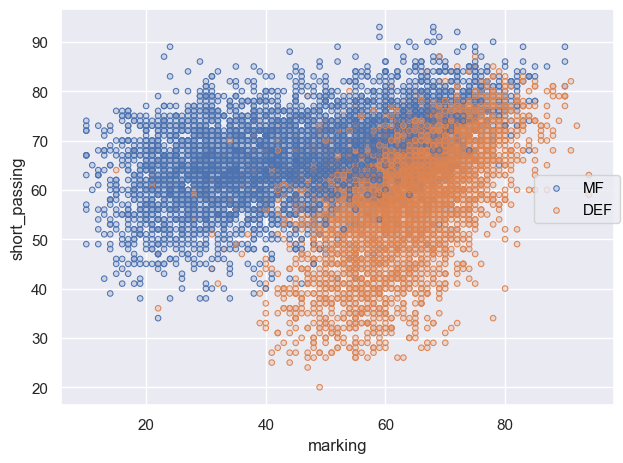


--- Método del Gradiente ---
Precision en entrenamiento: 0.8330223880597015 

Precision en entrenamiento: 0.8305970149253732


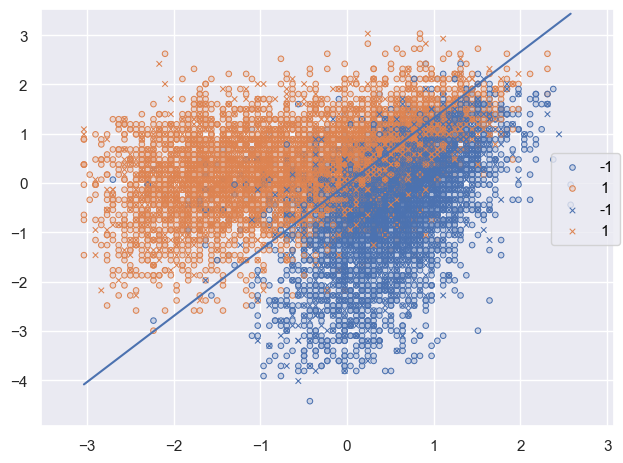


--- Método ADAM ---
Precision en entrenamiento: 0.8375932835820895 

Precision en entrenamiento: 0.8425373134328358


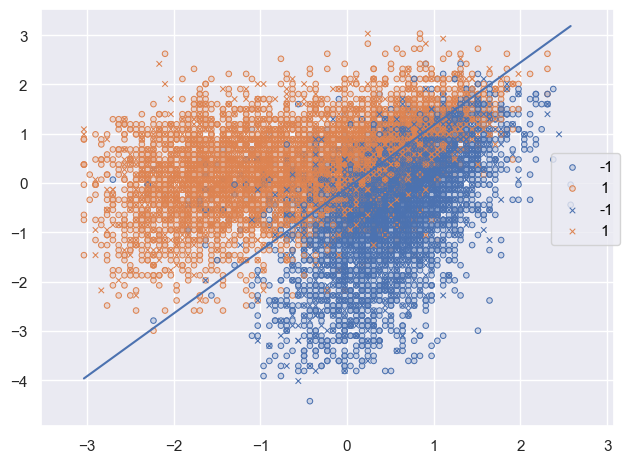


--- Comparación con mayor regularización (lam=0.1) ---
Gradiente:
Precision en entrenamiento: 0.823134328358209 

Precision en entrenamiento: 0.8205223880597015

ADAM:
Precision en entrenamiento: 0.8263059701492538 

Precision en entrenamiento: 0.8242537313432836


EXPLORACIÓN 2: MEDIOCAMPISTAS vs DELANTEROS
Atributos: vision vs finishing


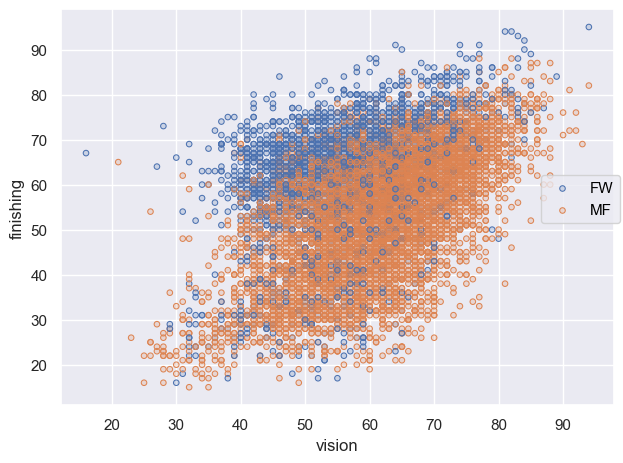


--- Método del Gradiente ---
Precision en entrenamiento: 0.7979598552155315 

Precision en entrenamiento: 0.7837719298245615


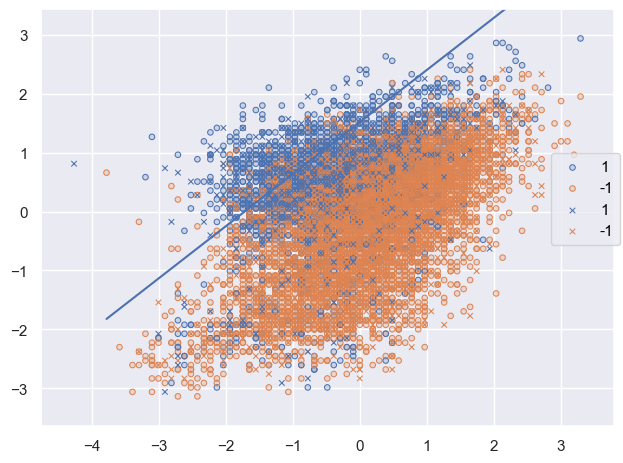


--- Método ADAM ---
Precision en entrenamiento: 0.8248327300647142 

Precision en entrenamiento: 0.8087719298245614


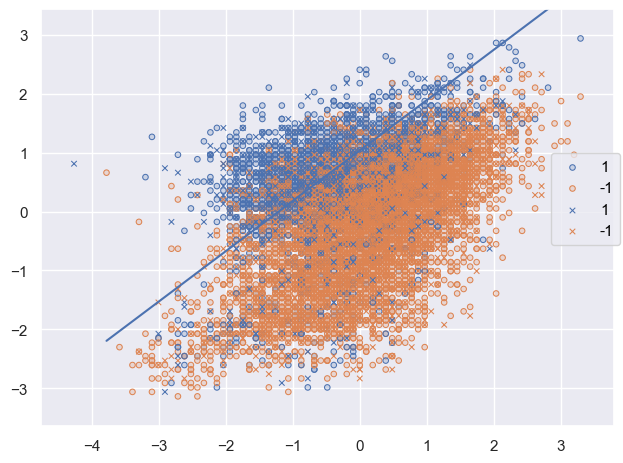


--- Comparación con paso más grande (alpha=0.05) ---
Gradiente:
Precision en entrenamiento: 0.8240649336404519 

Precision en entrenamiento: 0.8078947368421052

ADAM:
Precision en entrenamiento: 0.8248327300647142 

Precision en entrenamiento: 0.8087719298245614


RESUMEN COMPARATIVO

Configuración                            Gradiente       ADAM           
----------------------------------------------------------------------
GK vs FW (dribbling, penalties)          0.9993          0.9993         
DEF vs MF (marking, short_passing)       0.8306          0.8425         
MF vs FW (vision, finishing)             0.7838          0.8088         

OBSERVACIONES:

1. Separabilidad lineal: 
   - GK vs FW con dribbling/penalties muestra buena separación
   - DEF vs MF con marking/short_passing: los defensores tienen mayor marcaje,
     los mediocampistas mejor pase corto
   - MF vs FW con vision/finishing: mediocampistas con mejor visión de juego,
     delanteros con mejor finalización

2. Con

In [20]:
# Exploración 1: Defensores vs Mediocampistas - Marcaje vs Pases Cortos
print("=" * 70)
print("EXPLORACIÓN 1: DEFENSORES vs MEDIOCAMPISTAS")
print("Atributos: marking vs short_passing")
print("=" * 70)

# Visualizar los datos
graficar(fifa_data, posicion_dict, 'DEF', 'MF', 'marking', 'short_passing')

# Filtrar y preparar datos
X1, X1_test, y1, y1_test = filtrar_posicion_atributos(fifa_data, posicion_dict, 'DEF', 'MF', 'marking', 'short_passing')

# Método del Gradiente
print("\n--- Método del Gradiente ---")
w_grad_1, b_grad_1 = metodo_gradiente_svm(X1, y1, lam=0.01, alpha=0.01, k_max=1000)
calcular_precision(X1, X1_test, y1, y1_test, w_grad_1, b_grad_1)
graficar_solucion(X1, X1_test, y1, y1_test, w_grad_1, b_grad_1)

# ADAM
print("\n--- Método ADAM ---")
w_adam_1, b_adam_1 = adam_svm(X1, y1, lam=0.01, alpha=0.01, k_max=1000)
calcular_precision(X1, X1_test, y1, y1_test, w_adam_1, b_adam_1)
graficar_solucion(X1, X1_test, y1, y1_test, w_adam_1, b_adam_1)

# Comparación con diferentes hiperparámetros
print("\n--- Comparación con mayor regularización (lam=0.1) ---")
w_grad_1b, b_grad_1b = metodo_gradiente_svm(X1, y1, lam=0.1, alpha=0.01, k_max=1000)
w_adam_1b, b_adam_1b = adam_svm(X1, y1, lam=0.1, alpha=0.01, k_max=1000)

print("Gradiente:")
calcular_precision(X1, X1_test, y1, y1_test, w_grad_1b, b_grad_1b)
print("\nADAM:")
calcular_precision(X1, X1_test, y1, y1_test, w_adam_1b, b_adam_1b)


# Exploración 2: Mediocampistas vs Delanteros - Visión vs Finalización
print("\n\n" + "=" * 70)
print("EXPLORACIÓN 2: MEDIOCAMPISTAS vs DELANTEROS")
print("Atributos: vision vs finishing")
print("=" * 70)

# Visualizar los datos
graficar(fifa_data, posicion_dict, 'MF', 'FW', 'vision', 'finishing')

# Filtrar y preparar datos
X2, X2_test, y2, y2_test = filtrar_posicion_atributos(fifa_data, posicion_dict, 'MF', 'FW', 'vision', 'finishing')

# Método del Gradiente
print("\n--- Método del Gradiente ---")
w_grad_2, b_grad_2 = metodo_gradiente_svm(X2, y2, lam=0.01, alpha=0.01, k_max=1000)
calcular_precision(X2, X2_test, y2, y2_test, w_grad_2, b_grad_2)
graficar_solucion(X2, X2_test, y2, y2_test, w_grad_2, b_grad_2)

# ADAM
print("\n--- Método ADAM ---")
w_adam_2, b_adam_2 = adam_svm(X2, y2, lam=0.01, alpha=0.01, k_max=1000)
calcular_precision(X2, X2_test, y2, y2_test, w_adam_2, b_adam_2)
graficar_solucion(X2, X2_test, y2, y2_test, w_adam_2, b_adam_2)

# Probar con paso más grande
print("\n--- Comparación con paso más grande (alpha=0.05) ---")
w_grad_2b, b_grad_2b = metodo_gradiente_svm(X2, y2, lam=0.01, alpha=0.05, k_max=1000)
w_adam_2b, b_adam_2b = adam_svm(X2, y2, lam=0.01, alpha=0.05, k_max=1000)

print("Gradiente:")
calcular_precision(X2, X2_test, y2, y2_test, w_grad_2b, b_grad_2b)
print("\nADAM:")
calcular_precision(X2, X2_test, y2, y2_test, w_adam_2b, b_adam_2b)


# Resumen comparativo de todas las exploraciones
print("\n\n" + "=" * 70)
print("RESUMEN COMPARATIVO")
print("=" * 70)

resultados = [
    ("GK vs FW (dribbling, penalties)", 
     accuracy_score(y_test, np.sign(X_test @ w_grad1 + b_grad1)),
     accuracy_score(y_test, np.sign(X_test @ w_adam1 + b_adam1))),
    ("DEF vs MF (marking, short_passing)", 
     accuracy_score(y1_test, np.sign(X1_test @ w_grad_1 + b_grad_1)),
     accuracy_score(y1_test, np.sign(X1_test @ w_adam_1 + b_adam_1))),
    ("MF vs FW (vision, finishing)", 
     accuracy_score(y2_test, np.sign(X2_test @ w_grad_2 + b_grad_2)),
     accuracy_score(y2_test, np.sign(X2_test @ w_adam_2 + b_adam_2)))
]

print("\n{:<40} {:<15} {:<15}".format("Configuración", "Gradiente", "ADAM"))
print("-" * 70)
for config, acc_grad, acc_adam in resultados:
    print("{:<40} {:<15.4f} {:<15.4f}".format(config, acc_grad, acc_adam))

print("\n" + "=" * 70)
print("OBSERVACIONES:")
print("=" * 70)
print("""
1. Separabilidad lineal: 
   - GK vs FW con dribbling/penalties muestra buena separación
   - DEF vs MF con marking/short_passing: los defensores tienen mayor marcaje,
     los mediocampistas mejor pase corto
   - MF vs FW con vision/finishing: mediocampistas con mejor visión de juego,
     delanteros con mejor finalización

2. Convergencia de ADAM:
   - En problemas bien separados, ADAM y Gradiente dan resultados similares
   - En problemas difíciles, ADAM puede ser más inestable
   - La tasa de aprendizaje es crítica para ADAM

3. Regularización:
   - Mayor λ penaliza más la norma de w, dando fronteras más suaves
   - Útil cuando hay overfitting o clases muy mezcladas

4. Interpretación de atributos:
   - marking: capacidad defensiva de marcar rivales
   - short_passing: precisión en pases cortos
   - vision: capacidad de ver jugadas y espacios
   - finishing: capacidad de definir y anotar goles

5. Recomendaciones:
   - Usar Gradiente simple para estabilidad
   - ADAM puede ser más rápido pero requiere ajuste cuidadoso de α
   - Probar diferentes valores de λ según la dificultad del problema
""")

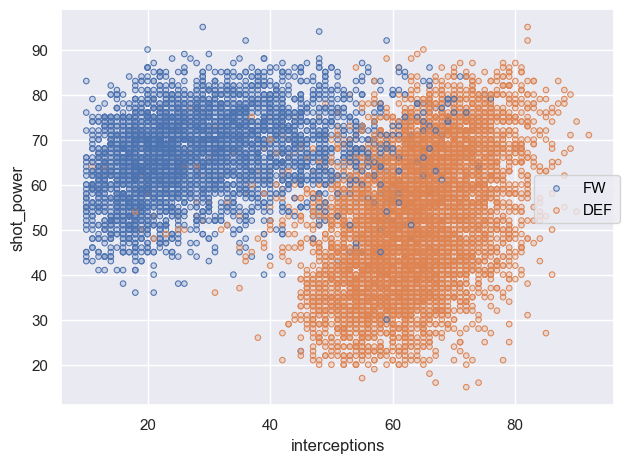

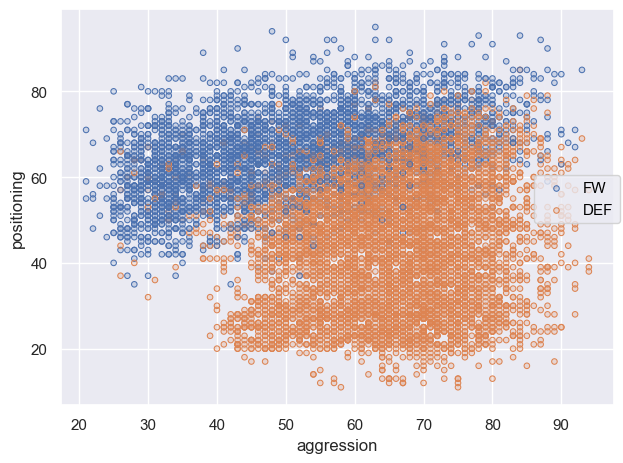

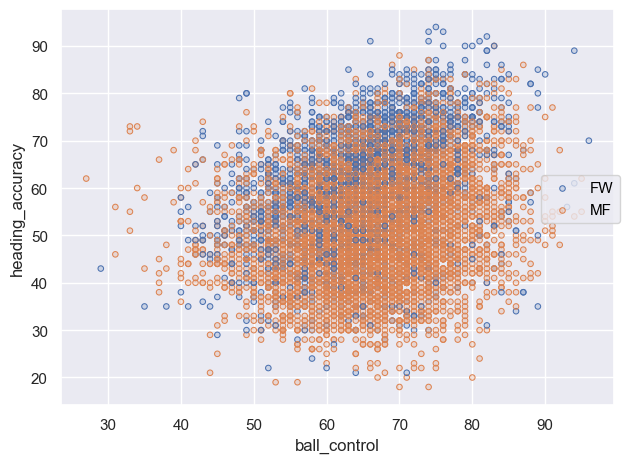

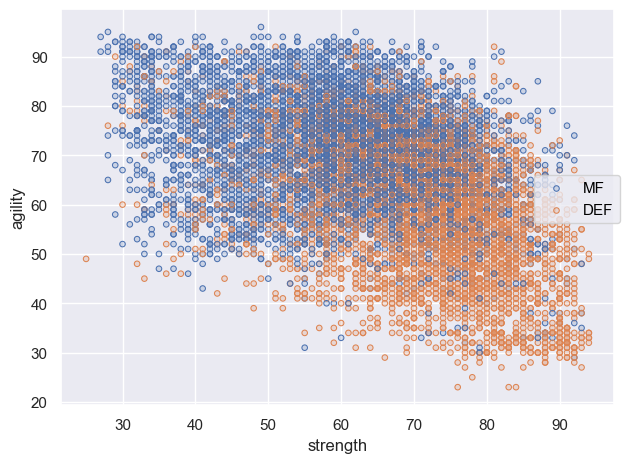

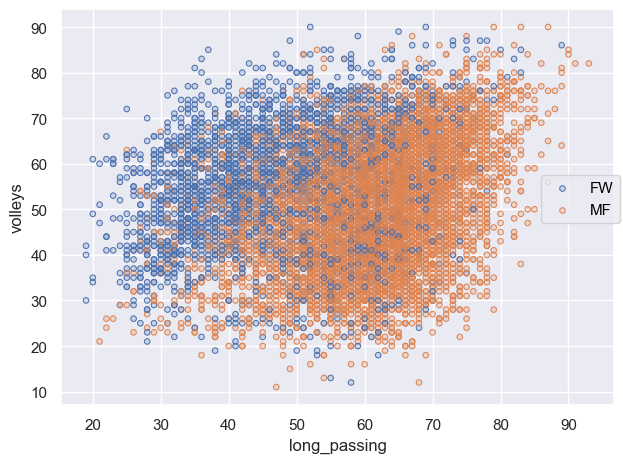

In [21]:
# Exploraciones adicionales sugeridas:

# 1. Defensores vs Delanteros - Intercepciones vs Potencia de Disparo
graficar(fifa_data, posicion_dict, 'DEF', 'FW', 'interceptions', 'shot_power')
X_alt1, X_alt1_test, y_alt1, y_alt1_test = filtrar_posicion_atributos(
    fifa_data, posicion_dict, 'DEF', 'FW', 'interceptions', 'shot_power')

# 2. Defensores vs Delanteros - Agresión vs Posicionamiento
graficar(fifa_data, posicion_dict, 'DEF', 'FW', 'aggression', 'positioning')
X_alt2, X_alt2_test, y_alt2, y_alt2_test = filtrar_posicion_atributos(
    fifa_data, posicion_dict, 'DEF', 'FW', 'aggression', 'positioning')

# 3. Mediocampistas vs Delanteros - Control de Balón vs Remates de Cabeza
graficar(fifa_data, posicion_dict, 'MF', 'FW', 'ball_control', 'heading_accuracy')
X_alt3, X_alt3_test, y_alt3, y_alt3_test = filtrar_posicion_atributos(
    fifa_data, posicion_dict, 'MF', 'FW', 'ball_control', 'heading_accuracy')

# 4. Defensores vs Mediocampistas - Fuerza vs Agilidad
graficar(fifa_data, posicion_dict, 'DEF', 'MF', 'strength', 'agility')
X_alt4, X_alt4_test, y_alt4, y_alt4_test = filtrar_posicion_atributos(
    fifa_data, posicion_dict, 'DEF', 'MF', 'strength', 'agility')

# 5. Mediocampistas vs Delanteros - Pases Largos vs Voleas
graficar(fifa_data, posicion_dict, 'MF', 'FW', 'long_passing', 'volleys')
X_alt5, X_alt5_test, y_alt5, y_alt5_test = filtrar_posicion_atributos(
    fifa_data, posicion_dict, 'MF', 'FW', 'long_passing', 'volleys')